In [52]:
#Mounting Google Drive
#Adding error handling when running Colab notebook locally
try:
    from google.colab import drive
    drive.mount('/content/drive')
except ModuleNotFoundError:
    pass
else:
    pass

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [54]:
filepath = '/content/drive/Othercomputers/My Laptop/data-science-assignments/07 - Logistic Regression Regularization/'
filename = 'cancer.csv'
filepathname = filepath + filename

In [55]:
df = pd.read_csv(filepathname)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [56]:
df['diagnosis'].value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [57]:
df.drop(columns = ['id'], inplace=True)

In [58]:
df.replace({'diagnosis':{'M':1,'B':0}},inplace=True)

In [59]:
y = df['diagnosis']
X = df.drop(columns = ['diagnosis'])

In [60]:
#Setting number to use for random_state
rs_num = 42

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = rs_num)

In [62]:
#Making column selectors
num_selector = make_column_selector(dtype_include='number')

In [63]:
#Instantiating the scaler
scaler = StandardScaler()

In [64]:
#imputing scaler tuple
scaler_tuple = (scaler, num_selector)

In [65]:
#Instantiating the column transformer
column_transformer = make_column_transformer(scaler_tuple)

In [66]:
def cal_confusion_matrix(my_title, reg_type, X_train, X_test, y_train, y_test):
    global column_transformer
    pipe = make_pipeline(column_transformer, reg_type)
    pipe.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)
    predictions = pipe.predict(X_test)
    my_confusion_matrix = metrics.confusion_matrix(y_test.values, predictions)
    true_neg, false_pos, false_neg, true_pos = my_confusion_matrix.ravel()
    disp = ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap = 'Blues')
    disp.ax_.set_title(my_title)
    plt.show()
    print(my_title," Score and Confusion Matrix")
    print("Score: {}, True Negative: {}, False Positive: {}, False Negative: {}, True Positive: {}\n".format(score, true_neg, false_pos, false_neg, true_pos))

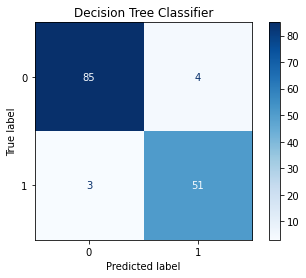

Decision Tree Classifier  Score and Confusion Matrix
Score: 0.951048951048951, True Negative: 85, False Positive: 4, False Negative: 3, True Positive: 51



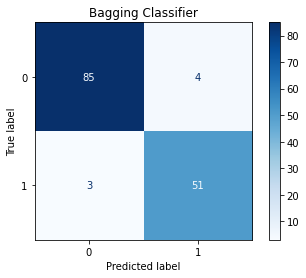

Bagging Classifier  Score and Confusion Matrix
Score: 0.951048951048951, True Negative: 85, False Positive: 4, False Negative: 3, True Positive: 51



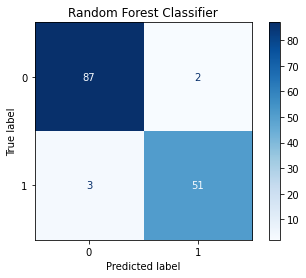

Random Forest Classifier  Score and Confusion Matrix
Score: 0.965034965034965, True Negative: 87, False Positive: 2, False Negative: 3, True Positive: 51



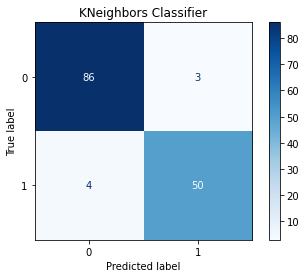

KNeighbors Classifier  Score and Confusion Matrix
Score: 0.951048951048951, True Negative: 86, False Positive: 3, False Negative: 4, True Positive: 50



In [67]:
my_classifier = DecisionTreeClassifier(random_state = rs_num)
my_title = "Decision Tree Classifier"
cal_confusion_matrix(my_title, my_classifier, X_train, X_test, y_train, y_test)

my_classifier = BaggingClassifier(random_state = rs_num)
my_title = "Bagging Classifier"
cal_confusion_matrix(my_title, my_classifier, X_train, X_test, y_train, y_test)

my_classifier = RandomForestClassifier(random_state = rs_num)
my_title = "Random Forest Classifier"
cal_confusion_matrix(my_title, my_classifier, X_train, X_test, y_train, y_test)

my_classifier = KNeighborsClassifier(n_neighbors = 1)
my_title = "KNeighbors Classifier"
cal_confusion_matrix(my_title, my_classifier, X_train, X_test, y_train, y_test)

1.   Based on uisng the Random Forest Classifier, the accuracy is 96.503%
2.   I set the Malignant as positive, since the premise is trying to detect breast cancer.
3.   False positives were two (2)
4.   False negatives were three (3)
5.   I believe the false negatives are more problematic; a diagnosis like this can lead to sudden illness that is significantly past stages where treatment can not help or might have helped if detected earlier. A false positive can seek help and monitoring early to see how disease progresses if patient is not ready for radical treatment.